In [1]:
import importlib
import bike_route_choice

# Make changes to my_module.py

importlib.reload(bike_route_choice)

<module 'bike_route_choice' from 'c:\\Users\\aber\\Documents\\ABM\\src\\asim\\scripts\\resident\\bike_route_choice.py'>

In [2]:
from bike_route_choice import *

In [3]:
cost_limit_mgra = 4
# zone_level = 'mgra'
cost_limit_taz = 30
# zone_level = 'taz'

In [4]:
start_time = time.time()
nodes, edges, traversals = read_bike_network_data(num_centroids=1000, zone_level='mgra')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

# Perform Dijkstra's algorithm
start_time = time.time()
shortest_paths, edge_mapping = perform_dijkstras_algorithm_traversals(nodes, edges, traversals, limit=cost_limit_mgra, zone_level='mgra', num_processors=NUM_PRCESSORS)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

start_time = time.time()
sp_df_mgra = convert_shortest_paths_to_long_df_numba_traversals(shortest_paths, nodes, edges, traversals, edge_mapping, zone_level='mgra')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

start_time = time.time()
summarize_shortest_paths_traversals(sp_df_mgra)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

Reading network data from  T:\ABM\user\aber\bike_route_choice\network
Nodes: (154569, 7) Edges: (366199, 13) Traversals: (724008, 11)
Time taken: 12.10 seconds
Need to calculate Dijkstra's on 1000 centroids with 1 processors
Processing Dijkstra's on 1000 centroids with limit=4...
Time taken: 5.04 seconds
Converting shortest paths to pandas dataframe...
Processing paths with numba...
Creating dataframe...
Time taken: 2.30 seconds
             origin   destination      distance         turns  bikeCostTotal  \
count  1.030300e+04  1.030300e+04  10303.000000  10303.000000   10303.000000   
mean   1.000085e+08  1.000083e+08      1.655993      3.568087       2.778992   
std    6.378237e+03  6.361653e+03      0.849429      1.826060       0.994509   
min    1.000000e+08  1.000000e+08      0.059306      0.000000       0.069112   
25%    1.000030e+08  1.000030e+08      0.987632      2.000000       2.027657   
50%    1.000072e+08  1.000071e+08      1.585476      3.000000       2.913715   
75%    

In [5]:
start_time = time.time()
nodes, edges, traversals = read_bike_network_data(num_centroids=500, zone_level='taz')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

# Perform Dijkstra's algorithm
start_time = time.time()
shortest_paths, edge_mapping = perform_dijkstras_algorithm_traversals(nodes, edges, traversals, limit=cost_limit_taz, zone_level='taz', num_processors=NUM_PRCESSORS)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

start_time = time.time()
sp_df_taz = convert_shortest_paths_to_long_df_numba_traversals(shortest_paths, nodes, edges, traversals, edge_mapping, zone_level='taz')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

start_time = time.time()
summarize_shortest_paths_traversals(sp_df_taz)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

Reading network data from  T:\ABM\user\aber\bike_route_choice\network
Nodes: (154569, 7) Edges: (366199, 13) Traversals: (724008, 11)
Time taken: 11.30 seconds
Need to calculate Dijkstra's on 500 centroids with 1 processors
Processing Dijkstra's on 500 centroids with limit=30...
Time taken: 28.06 seconds
Converting shortest paths to pandas dataframe...
Processing paths with numba...
Creating dataframe...
Time taken: 35.40 seconds
             origin   destination      distance         turns  bikeCostTotal  \
count  9.717400e+04  9.717400e+04  97174.000000  97174.000000   97174.000000   
mean   2.000025e+08  2.000023e+08     12.997142     11.867341      17.936170   
std    1.302200e+03  1.273285e+03      6.251368      5.319089       7.553345   
min    2.000000e+08  2.000000e+08      0.088411      0.000000       0.209168   
25%    2.000014e+08  2.000013e+08      8.138523      8.000000      12.041805   
50%    2.000024e+08  2.000023e+08     13.086974     11.000000      18.489509   
75%   

Plotting the shortest path...


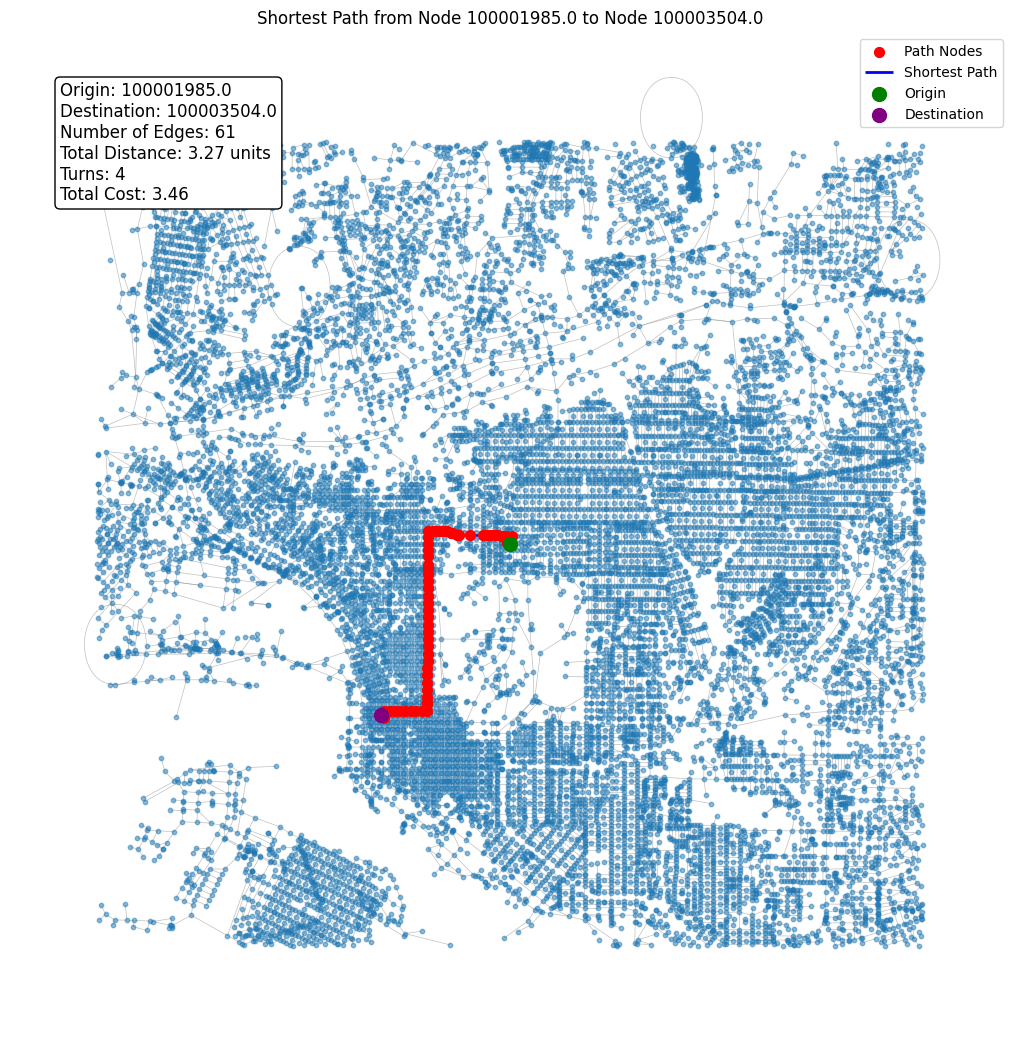

In [6]:
# Plot shortest path between random origin and destination
sp_df_mgra_rand = sp_df_mgra.sample(1)
origin = sp_df_mgra_rand.iloc[0]['origin']
destination = sp_df_mgra_rand.iloc[0]['destination']
plot_shortest_path_with_results_buffered(nodes, edges, sp_df_mgra, origin, destination, buffer_size=5280*cost_limit_mgra)

Plotting the shortest path...


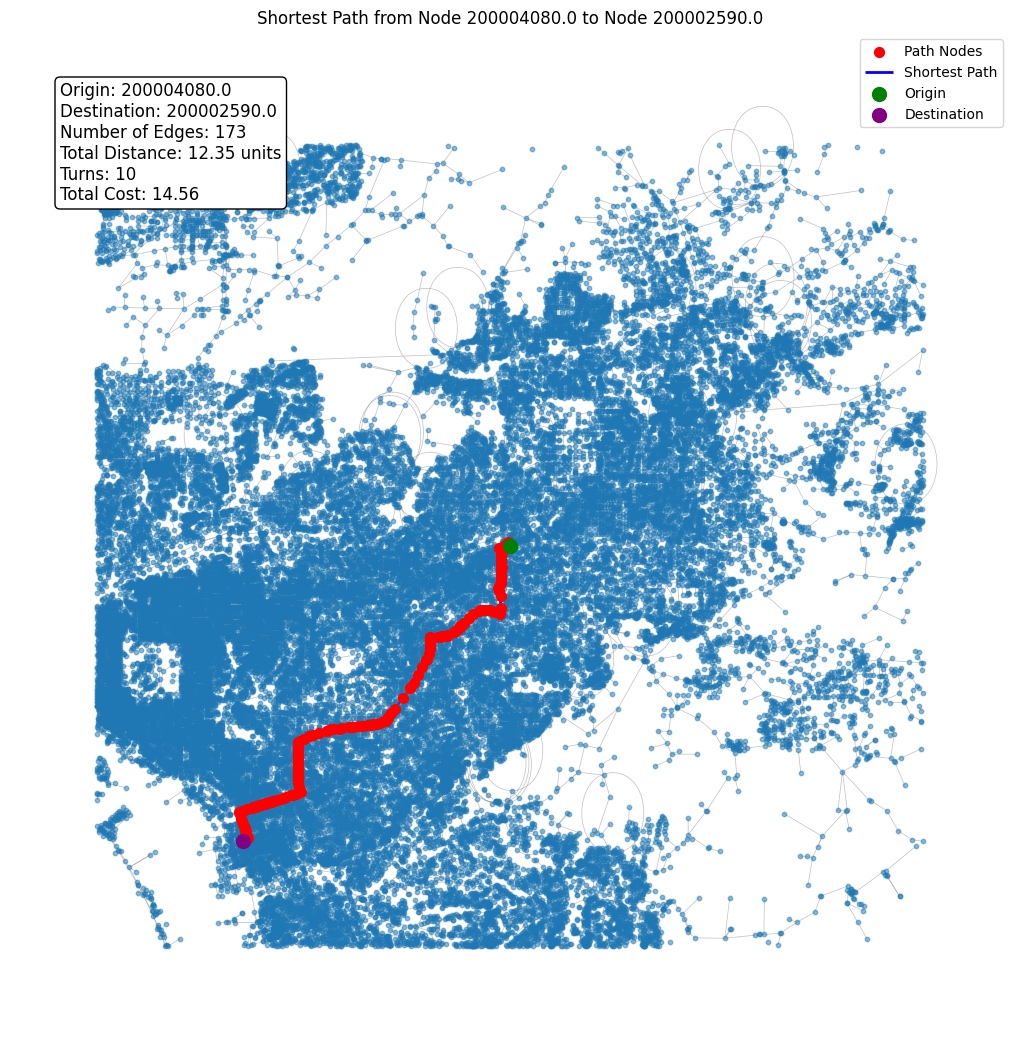

In [8]:
# Plot shortest path between random origin and destination
sp_df_taz_rand = sp_df_taz.sample(1)
origin = sp_df_taz_rand.iloc[0]['origin']
destination = sp_df_taz_rand.iloc[0]['destination']
plot_shortest_path_with_results_buffered(nodes, edges, sp_df_taz, origin, destination, buffer_size=(5280/3)*cost_limit_taz)